In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Real Estate Price Predictor

### 1. Dataset

In [2]:
#load data from csv
housing_train_data = pd.read_csv('housing_train.csv')
housing_test_data = pd.read_csv('housing_test.csv')
housing_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Extract attributes and target

In [3]:
# get target data vector
y = housing_train_data.iloc[:,-1:]

# get attributes matrix
housing_attributes = housing_train_data.iloc[:,1:-1]
housing_attributes.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### 2. Features

#### Categorical: 
Examples: LotShape, LatConfig, SaleCondition

(array([925.,   0.,   0., 484.,   0.,   0.,  41.,   0.,   0.,  10.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

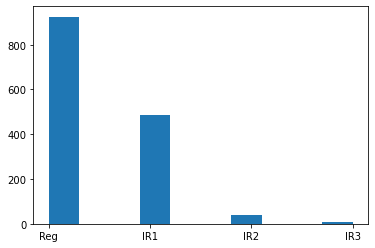

In [4]:
lot_shape = housing_attributes.loc[:,"LotShape"]
plt.hist(lot_shape)

##### Continuous: 
Examples: LotArea, 1stFlrSF, GarageArea

(array([ 81., 167., 293., 500., 240., 106.,  57.,  10.,   3.,   3.]),
 array([   0. ,  141.8,  283.6,  425.4,  567.2,  709. ,  850.8,  992.6,
        1134.4, 1276.2, 1418. ]),
 <BarContainer object of 10 artists>)

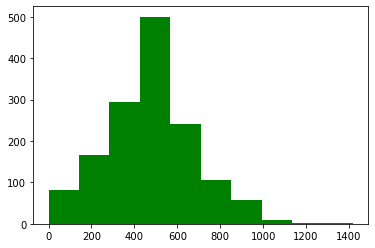

In [5]:
garage_area = housing_attributes.loc[:,"GarageArea"]
plt.hist(garage_area, color = 'g')

#### Feature selection

In [6]:
selected_attributes = housing_attributes.loc[:, ["MSZoning","Neighborhood", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "Foundation", "LotArea", "YearBuilt", "GarageCars", "FullBath"]]
selected_attributes.head()

,MSZoning,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,Foundation,LotArea,YearBuilt,GarageCars,FullBath
0,RL,CollgCr,1Fam,2Story,7,5,PConc,8450,2003,2,2
1,RL,Veenker,1Fam,1Story,6,8,CBlock,9600,1976,2,2
2,RL,CollgCr,1Fam,2Story,7,5,PConc,11250,2001,2,2
3,RL,Crawfor,1Fam,2Story,7,5,BrkTil,9550,1915,3,1
4,RL,NoRidge,1Fam,2Story,8,5,PConc,14260,2000,3,2


### 3. Pre-processing

#### Fill missing values

In [7]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
selected_attributes["GarageCars"] = mean_imputer.fit_transform(selected_attributes[["GarageCars"]])

#### Encode categorical features using ordinal encoder

In [8]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

selected_attributes["Neighborhood"] = ord_enc.fit_transform(selected_attributes[["Neighborhood"]])
selected_attributes["BldgType"] = ord_enc.fit_transform(selected_attributes[["BldgType"]])
selected_attributes["HouseStyle"] = ord_enc.fit_transform(selected_attributes[["HouseStyle"]])
selected_attributes["Foundation"] = ord_enc.fit_transform(selected_attributes[["Foundation"]])

selected_attributes.head()

,MSZoning,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,Foundation,LotArea,YearBuilt,GarageCars,FullBath
0,RL,5.0,0.0,5.0,7,5,2.0,8450,2003,2.0,2
1,RL,24.0,0.0,2.0,6,8,1.0,9600,1976,2.0,2
2,RL,5.0,0.0,5.0,7,5,2.0,11250,2001,2.0,2
3,RL,6.0,0.0,5.0,7,5,0.0,9550,1915,3.0,1
4,RL,15.0,0.0,5.0,8,5,2.0,14260,2000,3.0,2


#### Encode categorical features using one hot encoder

In [9]:
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder()
oh_enc_results = oh_enc.fit_transform(selected_attributes[['MSZoning']])
selected_attributes = selected_attributes.join(pd.DataFrame(oh_enc_results.toarray(), columns=oh_enc.categories_))
selected_attributes = selected_attributes.drop(['MSZoning'], axis=1)
selected_attributes.head()

,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,Foundation,LotArea,YearBuilt,GarageCars,FullBath,"(C (all),)","(FV,)","(RH,)","(RL,)","(RM,)"
0,5.0,0.0,5.0,7,5,2.0,8450,2003,2.0,2,0.0,0.0,0.0,1.0,0.0
1,24.0,0.0,2.0,6,8,1.0,9600,1976,2.0,2,0.0,0.0,0.0,1.0,0.0
2,5.0,0.0,5.0,7,5,2.0,11250,2001,2.0,2,0.0,0.0,0.0,1.0,0.0
3,6.0,0.0,5.0,7,5,0.0,9550,1915,3.0,1,0.0,0.0,0.0,1.0,0.0
4,15.0,0.0,5.0,8,5,2.0,14260,2000,3.0,2,0.0,0.0,0.0,1.0,0.0


##### MSZoning: One hot encoding

(array([1151.,    0.,  218.,    0.,    0.,   10.,    0.,   65.,    0.,
          16.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

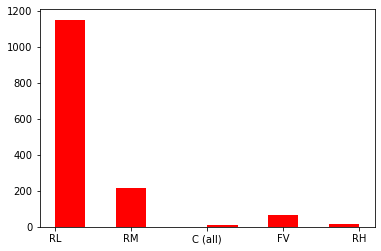

In [10]:
# plot histogram of one hot encoding features
ms_zoning = housing_attributes.loc[:,"MSZoning"]
plt.hist(ms_zoning, color = 'r')

array([[<AxesSubplot:title={'center':"('C (all)',)"}>,
        <AxesSubplot:title={'center':"('FV',)"}>],
       [<AxesSubplot:title={'center':"('RH',)"}>,
        <AxesSubplot:title={'center':"('RL',)"}>],
       [<AxesSubplot:title={'center':"('RM',)"}>, <AxesSubplot:>]],
      dtype=object)

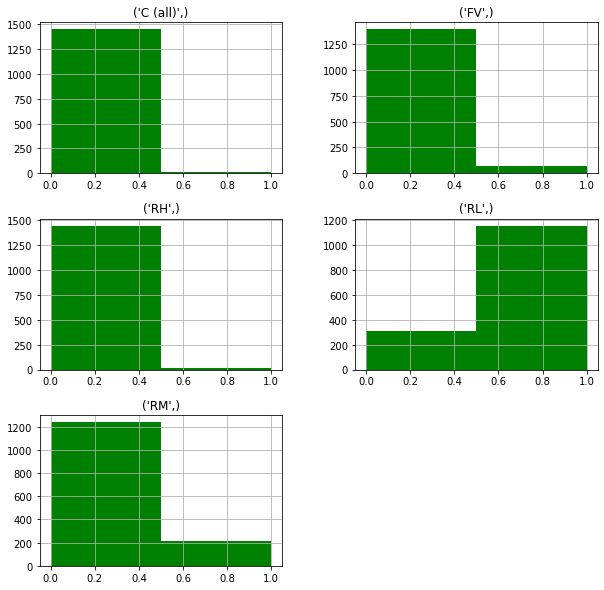

In [11]:
# individual histograms for each new feature
oh_encoded_features = pd.DataFrame(oh_enc_results.toarray(), columns=oh_enc.categories_)
oh_encoded_features.hist(bins=2, color = "green", figsize = (10,10))

#### Standardization

In [12]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(selected_attributes)
normalized_attributes = scaler.transform(selected_attributes)
print(normalized_attributes.mean(axis=0))
print(normalized_attributes.var(axis=0))

[ 8.33427695e-17  5.84007728e-17  1.09501449e-17  1.38701835e-16
  3.54054685e-16  1.70335587e-17 -5.84007728e-17  1.04634718e-15
  1.21668277e-16  1.18018228e-16  2.19002898e-17 -1.46001932e-17
  5.35340417e-17  0.00000000e+00 -2.92003864e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Get training data

In [13]:
# convert to Data Frame
X = pd.DataFrame(data=normalized_attributes, columns=selected_attributes.columns)

# add an extra column of ones
X['one'] = 1

# Collect data points for training
X_train = X
y_train = y

X.head()

,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,Foundation,LotArea,YearBuilt,GarageCars,FullBath,"(C (all),)","(FV,)","(RH,)","(RL,)","(RM,)",one
0,-1.206215,-0.411691,1.026689,0.651479,-0.517200,0.835599,-0.207142,1.050994,0.311725,0.789741,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,1
1,1.954302,-0.411691,-0.543457,-0.071836,2.179628,-0.549162,-0.091886,0.156734,0.311725,0.789741,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,1
2,-1.206215,-0.411691,1.026689,0.651479,-0.517200,0.835599,0.073480,0.984752,0.311725,0.789741,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,1
3,-1.039872,-0.411691,1.026689,0.651479,-0.517200,-1.933923,-0.096897,-1.863632,1.650307,-1.026041,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,1
4,0.457215,-0.411691,1.026689,1.374795,-0.517200,0.835599,0.375148,0.951632,1.650307,0.789741,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,1


### 4. OLS

#### Run algorithm

In [14]:
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)[:,0]
pd.DataFrame(data=theta_best[np.newaxis, :], columns=X.columns)

,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,Foundation,LotArea,YearBuilt,GarageCars,FullBath,"(C (all),)","(FV,)","(RH,)","(RL,)","(RM,)",one
0,4049.795833,-6315.851857,-1095.07673,43757.850368,3881.040884,3017.545086,9896.941284,3686.07293,14767.483949,10099.480941,1270.617436,-3744.599652,918.367683,6837.254231,-1279.226106,180921.19589


#### Get predictions

In [15]:
# generate predictions on the training set
y_train_pred = X_train.dot(theta_best)
y_train_pred.head()

0    225621.654849
1    212622.094094
2    228154.780248
3    209714.753616
4    289173.057475
dtype: float64

### 5. Evaluate

#### Standarize outputs

In [16]:
y_train_std = (y_train - y_train.mean())/(y_train.std())
y_train_pred_std = (y_train_pred - y_train_pred.mean())/(y_train_pred.std())

#### Run Mean squared error & R2 score

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# evaluate on training set
print('Train: Mean squared error: %.2f' 
      % mean_squared_error(y_train_std, y_train_pred_std))

print('Train: R2 squared score: %.2f'
      % r2_score(y_train_std, y_train_pred_std))

Train: Mean squared error: 0.30
Train: R2 squared score: 0.70
